<a href="https://colab.research.google.com/github/lnsayer/udemy_ml_course/blob/main/my_version_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Fri May  3 10:52:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

2.2.1+cu121
Using device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

- Automated Inspection: Used in manufacturing to identify defects.
- Retail: For example, in cashier-less stores where CV tracks what customers pick up.
- Healthcare: Assisting in diagnostic procedures through medical image analysis.


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

### Early stopping
We stop the learning of the network before it learns the noise of the training set. We could train for a large number of epochs and evaluate the performance on the validation set at certain epoch numbers. The optimal model is the one which has the lowest validation set error.

### Pruning
Selecting the most relevant features for our network. Identify important features in the training set and eliminate irrelevant ones. This can improve a model's generalisability and prevent overfitting.

### Regularisation
Eliminate factors which do not impact the predictiona capabilities by grading features based on importance. For example, mathematical calculations apply a penalty to features with minimal impact.




## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# Import numpy and pytorch
import numpy as np
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Import time
import time

# Print versions
print(f"PyTorch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}")

try:
  import torchmetrics
  print(f"Torhcmetrics version: {torchmetrics.__version__}")
except:
  !pip install -q torchmetrics
  import torchmetrics
  print(f"Torhcmetrics version: {torchmetrics.__version__}")
from torchmetrics.classification import MulticlassAccuracy

PyTorch version: 2.2.1+cu121
Torchvision version: 0.17.1+cu121
Torhcmetrics version: 1.3.2


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
train_data = datasets.FashionMNIST(
                                      root="data", # Where to download the data to
                                      train = "True", # download the training, not test data
                                      download= True, # download data if it doesn't exist on disk
                                      transform = ToTensor(), # images come as PIL format, we want to turn into Torch tensors
                                      target_transform = None # can transform labels as well
                                      )


test_data = datasets.FashionMNIST(
                                     root="data",
                                     train = False,
                                     download = True,
                                     transform = ToTensor()
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
# print(dir(train_data))
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

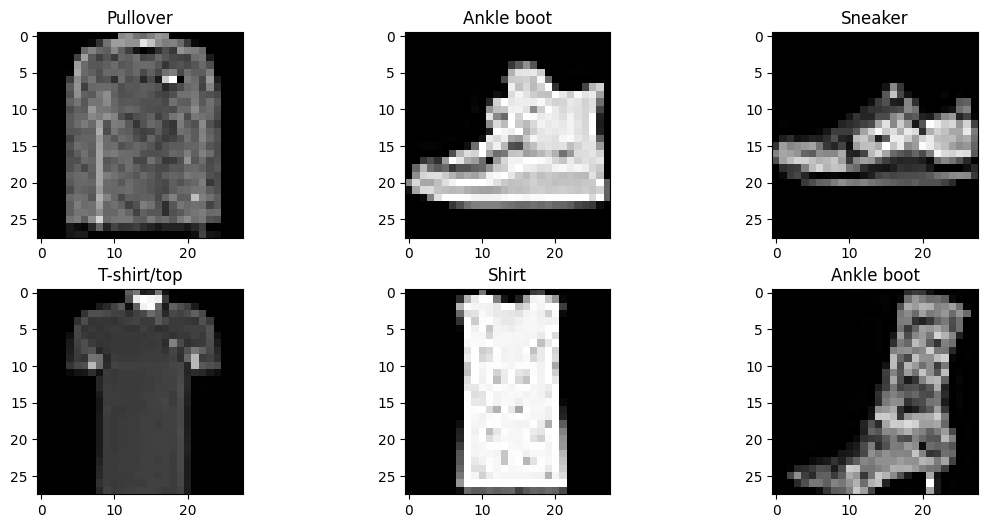

In [ ]:
fig = plt.figure(figsize=(14,6))
fig.tight_layout(pad=5.0)

for i in range(1,7):
  random_num = torch.randint(1, len(train_data), (1,)).item()
  image, label = train_data[random_num]
  image.squeeze_()
  plt.subplot(2,3,i)
  plt.imshow(image, cmap="gray")
  plt.title(train_data.classes[label])
  plt.subplots_adjust(wspace=0.05,
                    hspace=0.25)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
batch_size = 32

train_batches = torch.utils.data.DataLoader(dataset = train_data,
                                            batch_size = batch_size,
                                            shuffle = True)
test_batches = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = True)
print(len(train_batches), len(test_batches))
train_data[0][0].shape

1875 313


torch.Size([1, 28, 28])

In [ ]:
# Check out what's inside the dataloader
train_features_batch, train_labels_batch = next(iter(train_batches))
test_features_batch, test_labels_batch = next(iter(test_batches))

print(train_labels_batch)
print(train_features_batch.shape)

class_names = train_data.classes
class_names

tensor([4, 3, 0, 0, 0, 4, 2, 8, 8, 7, 9, 6, 7, 3, 0, 8, 7, 3, 5, 2, 1, 6, 0, 4,
        7, 4, 1, 9, 9, 6, 3, 4])
torch.Size([32, 1, 28, 28])


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
input_features = 1
output_features = 10
hidden_units = 10
conv_kernel_size = 3
conv_padding = 1
max_pool_kernel_size = 2
max_pool_stride = 2

class tiny_vgg_cnn(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()

    self.layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_features, out_channels = hidden_units, kernel_size = conv_kernel_size, padding = conv_padding),
        nn.ReLU(),
    )
    self.layer_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = conv_kernel_size, padding = conv_padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = max_pool_kernel_size,
                     stride = max_pool_stride)
    )
    self.layer_3 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = conv_kernel_size, padding = conv_padding),
        nn.ReLU()
    )
    self.layer_4 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels = hidden_units, kernel_size = conv_kernel_size, padding = conv_padding),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = max_pool_kernel_size,
                     stride = max_pool_stride)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_features)
    )
  def forward(self, x):
    x = self.layer_1(x)
    x = self.layer_2(x)
    x = self.layer_3(x)
    x = self.layer_4(x)
    x = self.classifier(x)

    return x

model_2 = tiny_vgg_cnn(input_features,
                   output_features,
                   hidden_units).to(device)
model_2

tiny_vgg_cnn(
  (layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (layer_4): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
def timer(start_time, end_time):
  return end_time - start_time

In [ ]:
epochs = 5
from tqdm.auto import tqdm

def training_loop(epochs, train_data, model, loss_fn, optimizer):
  for epoch in tqdm(range(epochs)):
    model.to(device)
    epoch_train_loss, epoch_train_acc = 0, 0
    for batch, (x, y_true) in enumerate(train_data):
      # y_true = torch.tensor(y_true)
      x, y_true = x.to(device), y_true.to(device)
      # plt.imshow(x[0][0].squeeze_().cpu())

      y_logits = model(x)
      y_probs = torch.softmax(y_logits, dim=1)
      y_preds = torch.argmax(y_probs, dim=1)


      train_loss = loss_fn(y_logits, y_true)
      epoch_train_loss += train_loss

      accuracy_metric = MulticlassAccuracy(num_classes=10).to(device)
      train_accuracy = accuracy_metric(y_preds, y_true)
      epoch_train_acc += train_accuracy


      optimizer.zero_grad()

      train_loss.backward()

      optimizer.step()

      if batch % 400 == 0:
        print(f"epoch: {epoch}, batch: {batch}, train loss: {train_loss:.5f},  train_accuracy: {train_accuracy:.5f}")
    epoch_train_loss, epoch_train_acc = epoch_train_loss/len(train_data), epoch_train_acc/len(train_data)
    print(f"Epoch Train Loss: {epoch_train_loss:.5f}, Epoch Train Accuracy: {epoch_train_acc:.5f}\n----------")


model_2 = tiny_vgg_cnn(input_features,
                   output_features,
                   hidden_units)
training_loop(5, train_batches, model_2, loss_fn, optimizer)


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 1, 28, 28]) tensor([7, 0, 1, 3, 7, 7, 9, 9, 0, 4, 0, 4, 3, 8, 4, 2, 5, 2, 2, 0, 0, 7, 8, 7,
        0, 4, 3, 9, 7, 7, 7, 8], device='cuda:0')
epoch: 0, batch: 0, train loss: 2.30639,  train_accuracy: 0.00000
torch.Size([32, 1, 28, 28]) tensor([7, 2, 9, 3, 3, 2, 1, 8, 4, 3, 0, 0, 4, 0, 4, 4, 8, 8, 5, 1, 2, 0, 9, 3,
        3, 3, 2, 6, 5, 5, 5, 6], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([6, 8, 1, 2, 9, 9, 8, 2, 9, 3, 4, 3, 5, 2, 8, 6, 6, 8, 8, 6, 3, 4, 8, 6,
        9, 2, 2, 8, 8, 3, 9, 8], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([7, 3, 1, 1, 4, 1, 6, 2, 2, 2, 6, 2, 0, 9, 7, 7, 6, 0, 1, 8, 9, 2, 6, 7,
        0, 7, 6, 0, 1, 0, 9, 1], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([4, 7, 4, 8, 7, 4, 6, 7, 0, 2, 3, 9, 9, 9, 0, 6, 9, 4, 3, 7, 8, 0, 2, 2,
        5, 4, 8, 9, 7, 5, 6, 2], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([2, 6, 0, 4, 7, 1, 3, 3, 8, 2, 5, 2, 6, 8, 5, 6, 2, 0, 2, 9, 9, 0, 1, 8,
        8, 9, 6, 9, 0, 1, 4, 5], dev

Exception ignored in: <function _xla_gc_callback at 0x7f88c14a17e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


tensor([8, 4, 7, 5, 5, 0, 1, 9, 3, 8, 1, 3, 2, 0, 9, 3, 3, 0, 6, 2, 5, 6, 0, 6,
        5, 8, 3, 7, 4, 7, 0, 5], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([4, 6, 1, 9, 3, 1, 6, 4, 8, 7, 8, 1, 1, 8, 9, 5, 2, 1, 0, 8, 8, 0, 3, 9,
        5, 3, 2, 4, 2, 3, 9, 7], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([7, 4, 7, 9, 5, 6, 3, 7, 0, 6, 1, 1, 2, 5, 3, 6, 4, 2, 6, 2, 4, 5, 3, 6,
        5, 7, 7, 9, 6, 0, 5, 7], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([9, 2, 7, 7, 6, 3, 2, 2, 0, 1, 4, 4, 0, 2, 1, 8, 9, 2, 9, 4, 8, 8, 4, 2,
        9, 5, 4, 4, 5, 7, 8, 8], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([6, 3, 1, 7, 8, 3, 8, 1, 6, 0, 0, 8, 5, 7, 0, 8, 1, 5, 9, 2, 7, 6, 4, 5,
        4, 7, 6, 0, 6, 1, 3, 8], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([1, 0, 2, 4, 3, 8, 0, 2, 2, 2, 3, 9, 7, 7, 6, 6, 1, 2, 0, 5, 3, 5, 4, 1,
        9, 8, 6, 2, 5, 1, 0, 3], device='cuda:0')
torch.Size([32, 1, 28, 28]) tensor([3, 7, 7, 4, 5, 5, 3, 8, 3, 5, 4, 1, 6, 3, 1,

KeyboardInterrupt: 

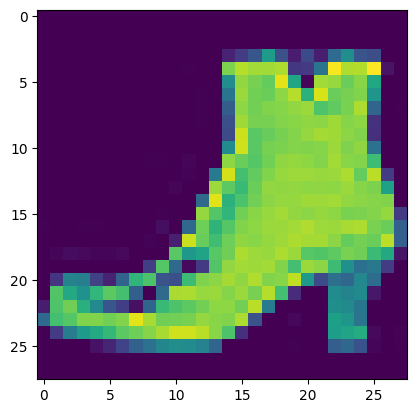

In [ ]:
for batch, (x, y_true) in enumerate(train_batches):
      # y_true = torch.tensor(y_true)
      x, y_true = x.to(device), y_true.to(device)
      # print(x[0])
      plt.imshow(x[0][0].squeeze_().cpu())
      break



## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?